In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [35]:
df = pd.read_csv("rice data.csv")

In [36]:
df.shape

(75000, 107)

In [37]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [39]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,Arborio
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,Karacadag
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,Arborio
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,Ipsala
74999,12931,452.635,185.5138,90.2651,0.8736,128.3131,0.9760,13249,0.7640,2.0552,...,121.4198,63.5424,65.2355,111.4580,63.0129,63.9117,0.4162,0.4414,0.4626,Ipsala


In [40]:
df1 = df[['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'CLASS']]


In [41]:
df1.shape

(75000, 13)

In [42]:
df["CLASS"].value_counts()

,count
CLASS,
Basmati,15000
Arborio,15000
Jasmine,15000
Ipsala,15000
Karacadag,15000


In [43]:
df1["CLASS"].value_counts()

,count
CLASS,
Basmati,15000
Arborio,15000
Jasmine,15000
Ipsala,15000
Karacadag,15000


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          75000 non-null  int64  
 1   PERIMETER     75000 non-null  float64
 2   MAJOR_AXIS    75000 non-null  float64
 3   MINOR_AXIS    75000 non-null  float64
 4   ECCENTRICITY  75000 non-null  float64
 5   EQDIASQ       75000 non-null  float64
 6   SOLIDITY      75000 non-null  float64
 7   CONVEX_AREA   75000 non-null  int64  
 8   EXTENT        75000 non-null  float64
 9   ASPECT_RATIO  75000 non-null  float64
 10  ROUNDNESS     75000 non-null  float64
 11  COMPACTNESS   75000 non-null  float64
 12  CLASS         75000 non-null  object 
dtypes: float64(10), int64(2), object(1)
memory usage: 7.4+ MB


In [45]:
df1.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,8379.197507,378.169453,161.805540,66.829335,0.886077,101.731251,0.975896,8584.862320,0.633226,2.597063,0.732505,0.646079
std,3119.209274,70.597008,36.461005,16.689269,0.071906,17.874070,0.007966,3189.298025,0.123795,0.968982,0.138637,0.110787
min,3929.000000,261.040000,96.968300,34.673000,0.627700,70.728800,0.877500,4032.000000,0.278800,1.284500,0.392500,0.400600
25%,6259.000000,316.431500,132.623500,49.650200,0.846100,89.270400,0.970900,6385.000000,0.561000,1.876100,0.620600,0.551100
50%,7345.000000,351.261000,149.343950,69.183900,0.885600,96.705500,0.976400,7532.000000,0.655800,2.153200,0.775400,0.677100
75%,8901.000000,444.986000,197.462025,75.814125,0.950800,106.457100,0.982200,9153.000000,0.727800,3.228700,0.834500,0.725300
max,21019.000000,593.698000,255.647200,113.441100,0.986800,163.591600,0.992100,21633.000000,0.901700,6.179500,0.980000,0.879900


In [46]:
df1 = df1.fillna(0)

In [47]:
print(sum(df1.isnull().sum()))

0


In [48]:
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,0.5114,0.4751,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,0.8120,0.7065,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,0.6505,0.5689,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,0.5256,0.5007,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,0.7944,0.6932,Arborio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,0.8533,0.7364,Arborio
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,0.9287,0.8155,Karacadag
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,0.8273,0.7207,Arborio
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,0.7958,0.6917,Ipsala


In [52]:
imputer = SimpleImputer(strategy='mean')
df = np.array(df1)
df = pd.DataFrame(df1)
X = df1.drop(columns = ['CLASS'])
y = df1['CLASS']

sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

In [58]:
kf = KFold(n_splits=10, shuffle=False)

models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8), activation='logistic', max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

model_accuracies = {name: [] for name in models.keys()}

for fold, (train_idx, test_idx) in enumerate(kf.split(df1)):
    print(f"Fold {fold + 1} :")
    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        model_accuracies[name].append(acc)

        print(f"{name}: Accuracy = {acc:.4f}")

    print("-" * 40)


for name, accuracies in model_accuracies.items():
    print(f"{name}: Average Accuracy = {np.mean(accuracies):.4f}")

Fold 1 :
MLP: Accuracy = 0.9791
Random Forest: Accuracy = 0.9785
SVM: Accuracy = 0.9731
KNN: Accuracy = 0.9767
Logistic Regression: Accuracy = 0.9721
Decision Tree: Accuracy = 0.9679
----------------------------------------
Fold 2 :
MLP: Accuracy = 0.9809
Random Forest: Accuracy = 0.9805
SVM: Accuracy = 0.9769
KNN: Accuracy = 0.9812
Logistic Regression: Accuracy = 0.9757
Decision Tree: Accuracy = 0.9699
----------------------------------------
Fold 3 :
MLP: Accuracy = 0.9811
Random Forest: Accuracy = 0.9803
SVM: Accuracy = 0.9769
KNN: Accuracy = 0.9793
Logistic Regression: Accuracy = 0.9763
Decision Tree: Accuracy = 0.9712
----------------------------------------
Fold 4 :
MLP: Accuracy = 0.9795
Random Forest: Accuracy = 0.9788
SVM: Accuracy = 0.9749
KNN: Accuracy = 0.9781
Logistic Regression: Accuracy = 0.9744
Decision Tree: Accuracy = 0.9696
----------------------------------------
Fold 5 :
MLP: Accuracy = 0.9804
Random Forest: Accuracy = 0.9787
SVM: Accuracy = 0.9751
KNN: Accuracy = 

In [98]:
accuracy_df = pd.DataFrame({
    "Model": model_accuracies.keys(),
    "Accuracy": [np.mean(acc) for acc in model_accuracies.values()],
    "Error": [1 - np.mean(acc) for acc in model_accuracies.values()]
})

accuracy_df = accuracy_df.set_index("Model").applymap(lambda x: f"{x:.4f}")
accuracy_df

<ipython-input-98-0595ebe332d4>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  accuracy_df = accuracy_df.set_index("Model").applymap(lambda x: f"{x:.4f}")


,Accuracy,Error
Model,,
MLP,0.9803,0.0197
Random Forest,0.9798,0.0202
SVM,0.9758,0.0242
KNN,0.9789,0.0211
Logistic Regression,0.9746,0.0254
Decision Tree,0.9691,0.0309


In [71]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

model_metrics = {name: {"Precision": [], "Recall": [], "F1-Score": [], "Kappa": []} for name in models.keys()}

for fold, (train_idx, test_idx) in enumerate(kf.split(df1)):
    print(f"Fold {fold + 1} :")

    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        kappa = cohen_kappa_score(y_test, y_pred)



        model_metrics[name]["Precision"].append(prec)
        model_metrics[name]["Recall"].append(rec)
        model_metrics[name]["F1-Score"].append(f1)
        model_metrics[name]["Kappa"].append(kappa)

        print(f"{name}: Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}, Kappa={kappa:.4f}")

    print("-" * 50)



# Print the final table
#print(tabulate(table_data, headers=["Model", "Avg Acc", "Avg Error", "Avg Prec", "Avg Recall", "Avg F1", "Avg Kappa"], tablefmt="grid"))


Fold 1 :
MLP: Prec=0.9791, Rec=0.9791, F1=0.9791, Kappa=0.9738
Random Forest: Prec=0.9786, Rec=0.9785, F1=0.9785, Kappa=0.9732
SVM: Prec=0.9732, Rec=0.9731, F1=0.9731, Kappa=0.9663
KNN: Prec=0.9767, Rec=0.9767, F1=0.9767, Kappa=0.9708
Logistic Regression: Prec=0.9723, Rec=0.9721, F1=0.9721, Kappa=0.9652
Decision Tree: Prec=0.9679, Rec=0.9679, F1=0.9679, Kappa=0.9598
--------------------------------------------------
Fold 2 :
MLP: Prec=0.9809, Rec=0.9809, F1=0.9809, Kappa=0.9762
Random Forest: Prec=0.9805, Rec=0.9805, F1=0.9805, Kappa=0.9757
SVM: Prec=0.9770, Rec=0.9769, F1=0.9769, Kappa=0.9712
KNN: Prec=0.9812, Rec=0.9812, F1=0.9812, Kappa=0.9765
Logistic Regression: Prec=0.9758, Rec=0.9757, F1=0.9757, Kappa=0.9697
Decision Tree: Prec=0.9699, Rec=0.9699, F1=0.9699, Kappa=0.9623
--------------------------------------------------
Fold 3 :
MLP: Prec=0.9811, Rec=0.9811, F1=0.9811, Kappa=0.9763
Random Forest: Prec=0.9803, Rec=0.9803, F1=0.9803, Kappa=0.9753
SVM: Prec=0.9770, Rec=0.9769, F1=

In [93]:
metrics_df = pd.DataFrame({
    "Model": model_metrics.keys(),
    "Precision": [np.mean(metrics["Precision"]) for metrics in model_metrics.values()],
    "Recall": [np.mean(metrics["Recall"]) for metrics in model_metrics.values()],
    "F1-Score": [np.mean(metrics["F1-Score"]) for metrics in model_metrics.values()],
    "Kappa": [np.mean(metrics["Kappa"]) for metrics in model_metrics.values()]
})
metrics_df = metrics_df.set_index("Model").applymap(lambda x: f"{x:.4f}")
metrics_df

<ipython-input-93-3461177e37cd>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_df = metrics_df.set_index("Model").applymap(lambda x: f"{x:.4f}")


,Precision,Recall,F1-Score,Kappa
Model,,,,
MLP,0.9804,0.9803,0.9803,0.9754
Random Forest,0.9798,0.9798,0.9798,0.9748
SVM,0.9759,0.9758,0.9758,0.9697
KNN,0.9789,0.9789,0.9789,0.9736
Logistic Regression,0.9747,0.9746,0.9746,0.9682
Decision Tree,0.9691,0.9691,0.9691,0.9614


In [91]:
accuracy_df

,Model,Average Accuracy,Avg Error
0,MLP,0.9803,0.0197
1,Random Forest,0.9798,0.0202
2,SVM,0.9758,0.0242
3,KNN,0.9789,0.0211
4,Logistic Regression,0.9746,0.0254
5,Decision Tree,0.9691,0.0309


In [99]:
performance = pd.merge(accuracy_df, metrics_df, on="Model")
performance

,Accuracy,Error,Precision,Recall,F1-Score,Kappa
Model,,,,,,
MLP,0.9803,0.0197,0.9804,0.9803,0.9803,0.9754
Random Forest,0.9798,0.0202,0.9798,0.9798,0.9798,0.9748
SVM,0.9758,0.0242,0.9759,0.9758,0.9758,0.9697
KNN,0.9789,0.0211,0.9789,0.9789,0.9789,0.9736
Logistic Regression,0.9746,0.0254,0.9747,0.9746,0.9746,0.9682
Decision Tree,0.9691,0.0309,0.9691,0.9691,0.9691,0.9614


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrices = {name: np.zeros((len(np.unique(y)), len(np.unique(y))), dtype=int) for name in models.keys()}

for fold, (train_idx, test_idx) in enumerate(kf.split(df)):
    print(f"Fold {fold + 1} :")

    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)

        confusion_matrices[name] += cm

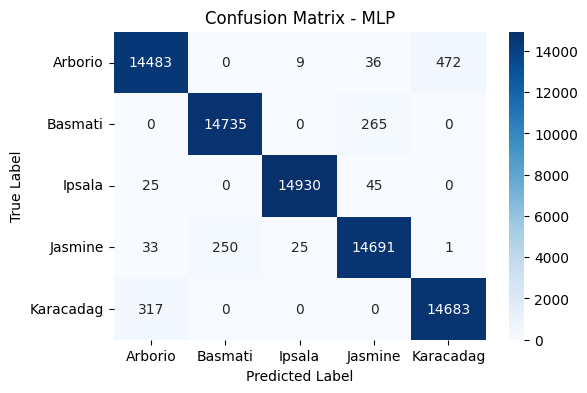

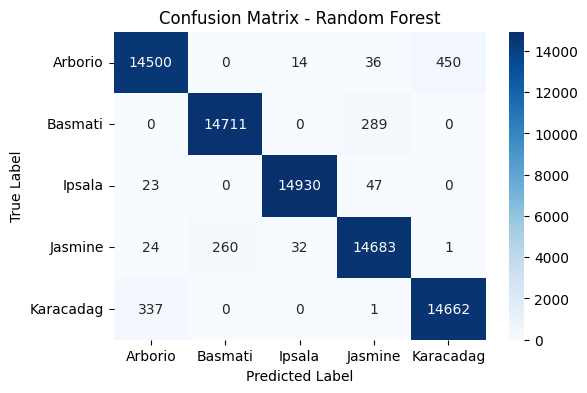

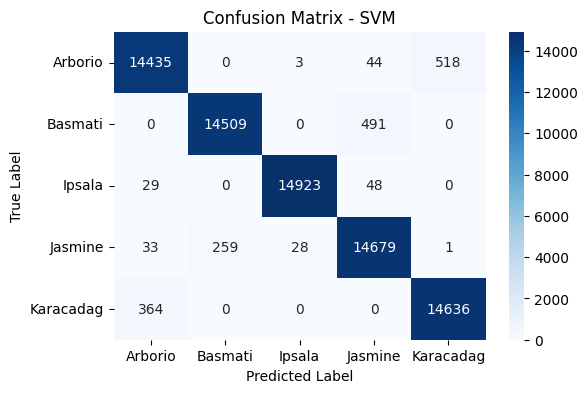

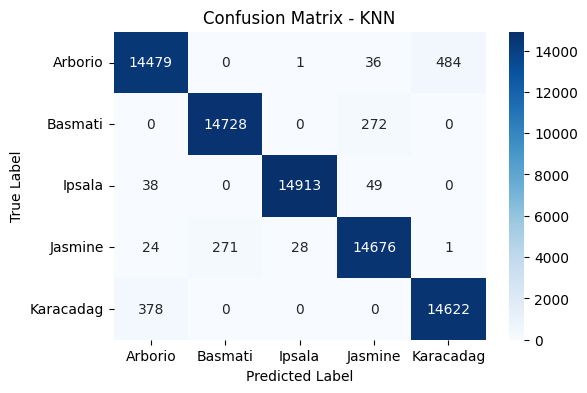

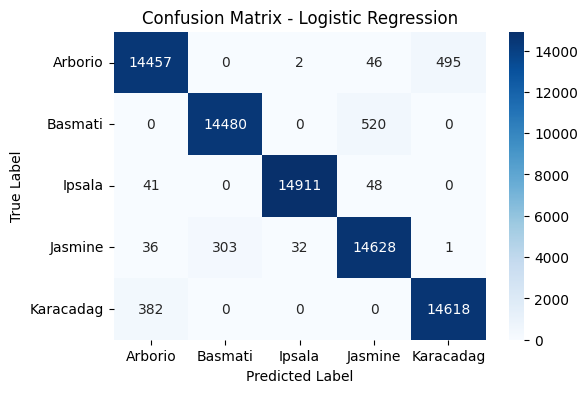

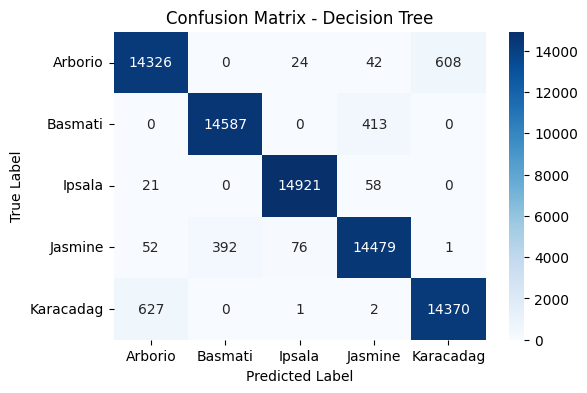

In [101]:
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()